In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1}).astype(int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train)

(455, 455)

In [ ]:
len(X_test),len(y_test)

(114, 114)

* we can give the above data to any machine learning classification algorithm like KNN, Logistic Regression, Naive Bayes etc.. -> but we can also give the same data to ANN Architecture also..
* To develop deep learning ANN we have many libraries like
  - Tensorflow
  - Keras
  - Pytorch
  - Caffee
  - Maxnet
  - Theano

* since in the initial stage we are going to use tensorflow and develop the entire deep learning ANN for above training data and also i am going to use test data for finding the performance

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # dense -> hidden layer
from tensorflow.keras.activations import sigmoid,relu

In [ ]:
X.shape[1]

30

In [ ]:
model = Sequential() # Sequential is used to build architectures and it is a class -> model is an object for that

model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim = X.shape[1])) # HL1
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # HL2
model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu')) # HL3
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # HL4

model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,665 (18.22 KB)

 Trainable params: 4,665 (18.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [ ]:
# know I will give the data to the above architecture

model.fit(X_train,y_train,epochs=50,batch_size=15,validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2981 - loss: 1.4999 - val_accuracy: 0.5604 - val_loss: 0.6800
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6144 - loss: 0.6882 - val_accuracy: 0.6484 - val_loss: 0.6821
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6240 - loss: 0.6887 - val_accuracy: 0.6484 - val_loss: 0.6804
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6390 - loss: 0.6864 - val_accuracy: 0.6484 - val_loss: 0.6784
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.6853 - val_accuracy: 0.6484 - val_loss: 0.6764
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6240 - loss: 0.6842 - val_accuracy: 0.6484 - val_loss: 0.6745
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6383 - loss: 0.6814 - val_accuracy: 0.6484 - val_loss: 0.6725
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6265 - loss: 0.6801 - val_accuracy: 0.6593 - val_loss

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
model.history.history['accuracy']

[0.26648351550102234,
 0.6346153616905212,
 0.6291208863258362,
 0.6291208863258362,
 0.6291208863258362,
 0.6291208863258362,
 0.6291208863258362,
 0.6318681240081787,
 0.6346153616905212,
 0.6318681240081787,
 0.6428571343421936,
 0.6373626589775085,
 0.6373626589775085,
 0.6318681240081787,
 0.6291208863258362,
 0.807692289352417,
 0.8901098966598511,
 0.8516483306884766,
 0.8543956279754639,
 0.906593382358551,
 0.8983516693115234,
 0.9120879173278809,
 0.9093406796455383,
 0.9203296899795532,
 0.8736263513565063,
 0.8763736486434937,
 0.9120879173278809,
 0.8901098966598511,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.9175823926925659,
 0.9230769276618958,
 0.8928571343421936,
 0.8928571343421936,
 0.8818681240081787,
 0.9285714030265808,
 0.9230769276618958,
 0.9230769276618958,
 0.9148351550102234,
 0.9285714030265808,
 0.9038461446762085,
 0.901098906993866,
 0.9285714030265808,
 0.9120879173278809,
 0.9175823926925659,
 0.9313187003135681,
 0.9203296899795

In [ ]:
model.history.history['loss']

[1.1408140659332275,
 0.6888349056243896,
 0.6881930828094482,
 0.6866392493247986,
 0.6850435137748718,
 0.6833166480064392,
 0.681749165058136,
 0.6797638535499573,
 0.6777336001396179,
 0.6770357489585876,
 0.6723085045814514,
 0.671107292175293,
 0.6689387559890747,
 0.6719146370887756,
 0.6664412617683411,
 0.5421653389930725,
 0.46988555788993835,
 0.49292582273483276,
 0.48192915320396423,
 0.4427216947078705,
 0.4360668957233429,
 0.4285098910331726,
 0.4258304536342621,
 0.4061122536659241,
 0.3600412607192993,
 0.41855695843696594,
 0.401140034198761,
 0.43482157588005066,
 0.40394794940948486,
 0.3901265263557434,
 0.386810302734375,
 0.36613044142723083,
 0.3745429217815399,
 0.3878954350948334,
 0.3867356777191162,
 0.4017471373081207,
 0.348190039396286,
 0.3487977087497711,
 0.3394564390182495,
 0.3352159857749939,
 0.33869075775146484,
 0.3497209846973419,
 0.3518165051937103,
 0.3300882875919342,
 0.34405723214149475,
 0.32946187257766724,
 0.32471007108688354,
 0.3199

In [ ]:
model.history.history['val_accuracy']

[0.5604395866394043,
 0.6483516693115234,
 0.6483516693115234,
 0.6483516693115234,
 0.6483516693115234,
 0.6483516693115234,
 0.6483516693115234,
 0.6593406796455383,
 0.6483516693115234,
 0.6813187003135681,
 0.6703296899795532,
 0.6483516693115234,
 0.6483516693115234,
 0.6483516693115234,
 0.4175824224948883,
 0.8791208863258362,
 0.9120879173278809,
 0.8901098966598511,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0.8241758346557617,
 0.8351648449897766,
 0.8131868243217468,
 0.791208803653717,
 0.8681318759918213,
 0.901098906993866,
 0.9120879173278809,
 0.9230769276618958,
 0.9230769276618958,
 0.9120879173278809,
 0.9120879173278809,
 0.8461538553237915,
 0.8241758346557617,
 0.8241758346557617,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.901098906993866,
 0.8571428656578064,
 0.901098906993866,
 0.901098906993866,
 0.901098906993866,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0

In [ ]:
model.history.history['val_loss']

[0.679989755153656,
 0.6821495890617371,
 0.6804003715515137,
 0.6784037351608276,
 0.6764090061187744,
 0.6745281219482422,
 0.6725371479988098,
 0.6693175435066223,
 0.6690189242362976,
 0.6597278714179993,
 0.6606646180152893,
 0.6651051640510559,
 0.663078784942627,
 0.662415623664856,
 0.6871787905693054,
 0.4951411783695221,
 0.4885297119617462,
 0.46374252438545227,
 0.46756497025489807,
 0.44482502341270447,
 0.44611823558807373,
 0.4944647550582886,
 0.46479377150535583,
 0.5027286410331726,
 0.4600633978843689,
 0.4661245346069336,
 0.4138830006122589,
 0.41470426321029663,
 0.4133248031139374,
 0.4021081328392029,
 0.4243994355201721,
 0.4004494249820709,
 0.4391925036907196,
 0.46003755927085876,
 0.4619095027446747,
 0.3721107244491577,
 0.3761293292045593,
 0.37347865104675293,
 0.36378931999206543,
 0.3601548671722412,
 0.35736382007598877,
 0.4098255932331085,
 0.35331347584724426,
 0.3501996397972107,
 0.3645486831665039,
 0.34230759739875793,
 0.3547002077102661,
 0.3

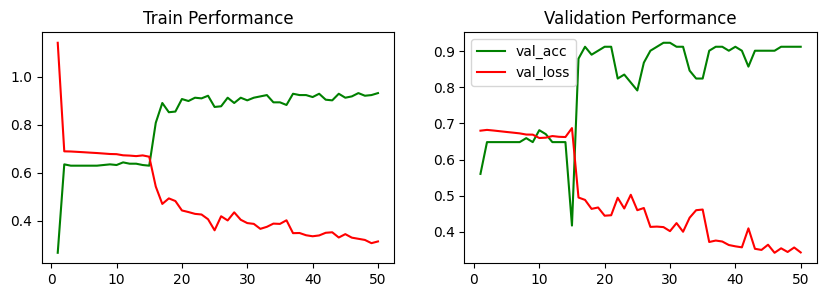

In [ ]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label = 'train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label = 'train_loss')

plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label = 'val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label = 'val_loss')
plt.legend(loc=0)
plt.show()

**Test_data**

In [ ]:
# 114 rows are available for test_data

X_test.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


In [ ]:
y_test.head(1)

,diagnosis
204,1


In [ ]:
d = []
for i in X_test.columns:
  d.append(X_test[i][204])
print(d)

[12.47, 18.6, 81.09, 481.9, 0.09965, 0.1058, 0.08005, 0.03821, 0.1925, 0.06373, 0.3961, 1.044, 2.497, 30.29, 0.006953, 0.01911, 0.02701, 0.01037, 0.01782, 0.003586, 14.97, 24.64, 96.05, 677.9, 0.1426, 0.2378, 0.2671, 0.1015, 0.3014, 0.0875]


In [ ]:
d = np.array(d).reshape(1,-1)
d.shape

(1, 30)

In [ ]:
# giving the data to the trained NN
if model.predict(d)[0][0] > 0.5:
  print(1)
else:
  print(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1


In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


array([[5.4106653e-01],
       [1.0406237e-06],
       [3.1870215e-03],
       [7.2550058e-01],
       [7.2550058e-01],
       [1.7120579e-04],
       [2.0373928e-07],
       [1.6423452e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [8.3928397e-03],
       [7.2550058e-01],
       [5.6252176e-01],
       [7.2550058e-01],
       [2.0210317e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [2.4177735e-04],
       [4.7071192e-01],
       [7.2550058e-01],
       [2.3351190e-06],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [8.4851154e-06],
       [7.2550058e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [6.4751577e-01],
       [7.2550058e-01],
       [7.2550058e-01],
       [2.2029299e-02],
       [7.2550058e-01],
       [5.2058989e-05],
       [7.2550058e-01],
       [7.2550058e-01],
       [2.455394

In [ ]:
c = []
for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)
c

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,c)

array([[38,  5],
       [ 0, 71]])

In [ ]:
accuracy_score(y_test,c)

0.956140350877193